Social Reasearch: FINAL PROJECT

NICCOLO' ZOBOLI 

ID: VR508441

The chosen dataset is available at the following Kaggle's link: https://www.kaggle.com/datasets/kaggle/sf-salaries/data


This dataset contains the names, job titles, and compensation of San Francisco city employees on an annual basis from 2011 to 2014.

This area is known for having one of the highest costs of living in the world and the highest concentration of billionaire residents.

My analysis focused on understanding the differences and inequalities between various groups. I considered variables such as gender and also broke everything down according to responsibilities, highlighting differences in benefits or base pay.

Finally, I compared all this data with current Italian salaries.




These are the libraries I used 

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from difflib import get_close_matches


This is where the first and most important part of the work begins, as I imported the csv file and started with the classic analysis procedure, focusing on the general information and numerical values within the dataset 

In [301]:
#import dataframe 
df=pd.read_csv('Salaries.csv', low_memory=False)

The data set is composed (148654, 13)


It is important to emphasise the importance of columns 

Id: A unique identifier for each record

EmployeeName: The name of the employee

JobTitle: The job title of the employee

BasePay: The base salary of the employee

OvertimePay: The overtime pay received by the employee

OtherPay: Any other types of pay received by the employee

Benefits: The benefits received by the employee

TotalPay: The total pay received by the employee (sum of BasePay, OvertimePay, and OtherPay)

TotalPayBenefits: The total pay including benefits

Year: The year the data corresponds to

Notes: Any additional notes related to the record

Agency: The agency the employee works for

Status: The employment status of the employee



In [302]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [303]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [304]:
#check shape of dataframe
df.shape

(148654, 13)

In [305]:
#general info's of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In this case there were a large number of null values in the columns of the: BasePay, 
Benefits, Notes and Status. 
Which I have highlighted in the graph below. 

In [306]:
#how many null values per column
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

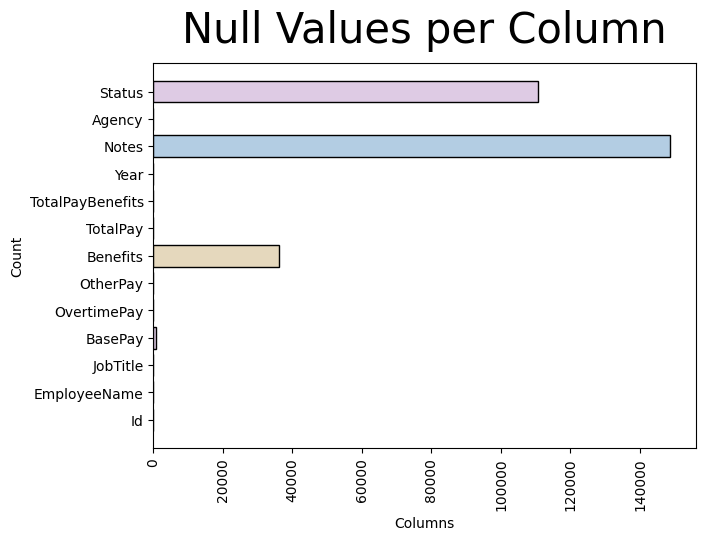

In [307]:
pastel1=plt.get_cmap('Pastel1')
plt.figure(figsize=(7, 5))
plt.title('Null Values per Column', fontsize=30, pad=15)
plt.barh(y=df.isnull().sum().index, width=df.isnull().sum(), color=pastel1.colors, edgecolor='black')
plt.xlabel('Columns') 
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [308]:
#create a mask to filter the "not provided" values
mask=(df!='Not Provided')&(df!='Not provided')
df=df[mask]

In [309]:
#check for duplicates
df.duplicated().sum()

0

In [310]:
#check for duplicates for EmployeeName
df['EmployeeName'].duplicated().sum()
#some employees have wages registered in different years

37844

In [311]:
#standardize employees names
df['EmployeeName']=df['EmployeeName'].apply(lambda x:str(x))
df['EmployeeName']=df['EmployeeName'].apply(lambda x:x.title())
df['EmployeeName'].head()

0       Nathaniel Ford
1         Gary Jimenez
2       Albert Pardini
3    Christopher Chong
4      Patrick Gardner
Name: EmployeeName, dtype: object

In [312]:
#standardize employees jobs
df['JobTitle']=df['JobTitle'].apply(lambda x:str(x))
df['JobTitle']=df['JobTitle'].apply(lambda x:x.title())
df['JobTitle'].head()

0    General Manager-Metropolitan Transit Authority
1                   Captain Iii (Police Department)
2                   Captain Iii (Police Department)
3              Wire Rope Cable Maintenance Mechanic
4      Deputy Chief Of Department,(Fire Department)
Name: JobTitle, dtype: object

In [313]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [314]:
print(df['Agency'].unique())
#"Agency" column it can only take one value (since dataset is about San Francisco Government jobs) so we can drop it

['San Francisco']


In [315]:
#drop the columns that aren't needed
#notes only has null values, and Id isn't needed since we have the index
df=df.drop(columns=['Notes', 'Id', 'Agency'])

In [316]:
#check how the Benefits column is calculated with the existing values
mask=df['Benefits'].notna()
#pick a person that we know has the Benefits value
p_with_benefits=df[mask].reset_index().loc[0]
#check that the benefits column is calculated by subracting TotalPay to TotalPayBenefits
round((p_with_benefits['TotalPayBenefits']-p_with_benefits['TotalPay']))==round(float(p_with_benefits['Benefits']))
#we can assume that this is the case for everyone

True

In [317]:
#fill na's of the "Benefits" column with the relative TotalPayBenefits-TotalPay
df['Benefits']=(df['TotalPayBenefits']-df['TotalPay'])
benefits_null_values=df['Benefits'].isnull().sum()
print(f'Benefits column now has: {benefits_null_values} null values')

Benefits column now has: 0 null values


In [318]:
#we know that BasePay only has 605 null values that we can drop since not much information is lost
df=df.dropna(subset=['BasePay', 'EmployeeName'])

In [319]:
#change the data type of 'BasePay', 'OvertimePay', 'OtherPay' to float
for col in ['BasePay', 'OvertimePay', 'OtherPay']:
    df[col]=df[col].astype(float)

In [320]:
#reset index
df=df.reset_index(drop=True)

In [321]:
#check how the dataframe has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148045 entries, 0 to 148044
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148045 non-null  object 
 1   JobTitle          148045 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148045 non-null  float64
 4   OtherPay          148045 non-null  float64
 5   Benefits          148045 non-null  float64
 6   TotalPay          148045 non-null  float64
 7   TotalPayBenefits  148045 non-null  float64
 8   Year              148045 non-null  int64  
 9   Status            38119 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 11.3+ MB


In [322]:
#all the null values, except for the Status column, have been dropped
df.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              109926
dtype: int64

In this pie chart, I have highlighted how the survey data was collected, breaking down the frequency of collection years 

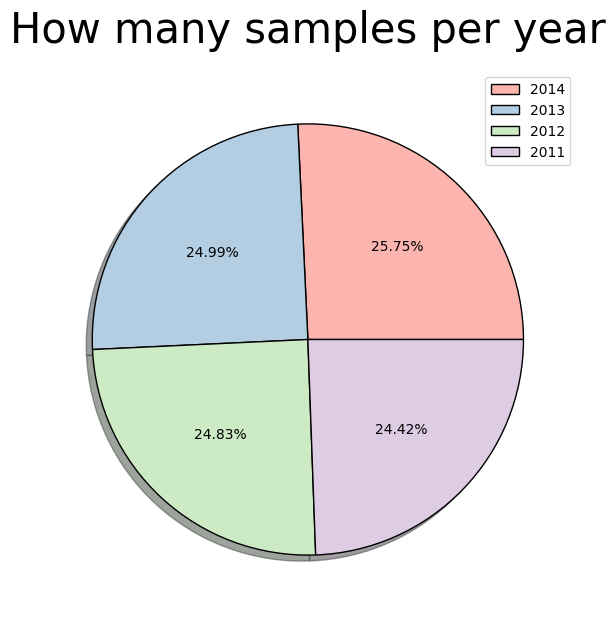

In [323]:
plt.figure(figsize=(7,7))
plt.title('How many samples per year', fontsize=30, pad=20)
plt.pie(df['Year'].value_counts(), autopct='%.2f%%', colors=pastel1.colors, wedgeprops={'edgecolor':'black'}, shadow=True)
plt.legend(labels=df['Year'].value_counts().index)
plt.show()

This is the part that interested me the most in the project, and also the most complex.

Since I was not able to extract the difference between men and women in the names, I had to think a lot about how to do it, also because I felt that this was the most interesting part of the project. 

So to create the breakdown I sampled the most common names, put them into a dictionary and from there through various functions I extracted the average salary of both men and women.

The interesting thing is that despite the fact that the dataset we examined is inherent to public salaries there is still a large inequality in Avarage Base Pay which is exacerbated when we look at the salary considering bonuses as well.

Furthermore, as I have highlighted in the third and fourth graphs, women have a generally lower salary and much rarer peaks than men. 

In [324]:
#I select the most common name in the dataset
common_names_gender = {
    'John': 'male', 'Michael': 'male', 'Robert': 'male', 'James': 'male', 'William': 'male',
    'David': 'male', 'Richard': 'male', 'Joseph': 'male', 'Charles': 'male', 'Thomas': 'male',
    'Mary': 'female', 'Patricia': 'female', 'Linda': 'female', 'Barbara': 'female', 'Elizabeth': 'female',
    'Jennifer': 'female', 'Maria': 'female', 'Susan': 'female', 'Margaret': 'female', 'Dorothy': 'female'
}

def guess_gender_simple(name):
    first_name = name.split()[0]
    return common_names_gender.get(first_name, 'unknown')

df['Gender'] = df['EmployeeName'].apply(guess_gender_simple)
df['Gender'].value_counts()

#filter data without Gender 
df_filtered = df[df['Gender'] != 'unknown'].copy()

# Converting 'BasePay' and 'TotalPay' in numerical value
df_filtered.loc[:, 'BasePay'] = pd.to_numeric(df_filtered['BasePay'], errors='coerce')
df_filtered.loc[:, 'TotalPay'] = pd.to_numeric(df_filtered['TotalPay'], errors='coerce')
df_filtered.dropna(subset=['BasePay', 'TotalPay'], inplace=True)

#Avarage Salary for gender 
mean_basepay = df_filtered.groupby('Gender')['BasePay'].mean()
mean_totalpay = df_filtered.groupby('Gender')['TotalPay'].mean()







Graphs for Avarage Base Pay and Avarage Total pay

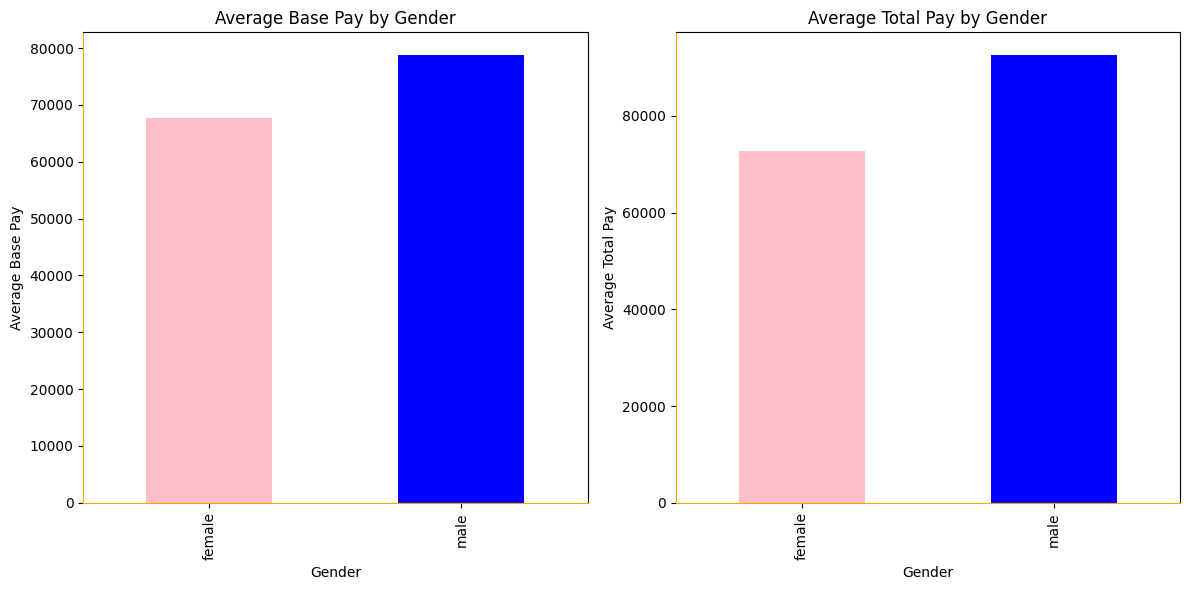

In [325]:
plt.figure(figsize=(12, 6))

#basepay
plt.subplot(1, 2, 1)
mean_basepay.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Base Pay by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Base Pay')
plt.gca().spines['bottom'].set_color('orange')
plt.gca().spines['left'].set_color('orange')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')

#totalpay
plt.subplot(1, 2, 2)
mean_totalpay.plot(kind='bar', color=['pink', 'blue'])
plt.title('Average Total Pay by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Pay')
plt.gca().spines['bottom'].set_color('orange')
plt.gca().spines['left'].set_color('orange')
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')

plt.tight_layout()
plt.show()


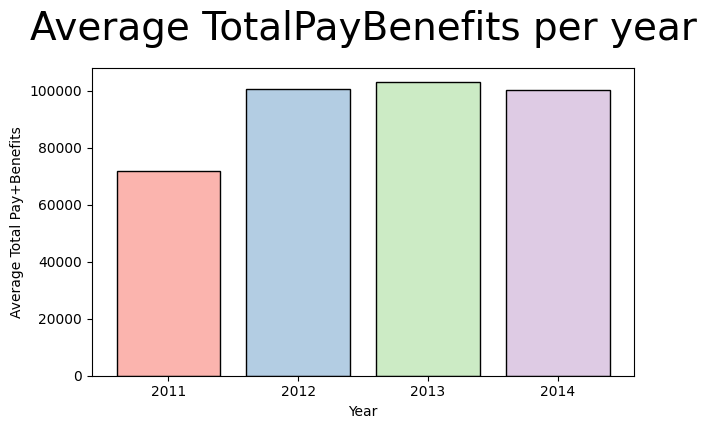

In [326]:
mean_pay_per_year=df.groupby('Year')['TotalPayBenefits'].mean()
plt.figure(figsize=(7, 4))
plt.title('Average TotalPayBenefits per year', fontsize=28, pad=20)
plt.bar(x=mean_pay_per_year.index, height=mean_pay_per_year, color=pastel1.colors, edgecolor='black')
plt.xticks(range(2011, 2015))
plt.xlabel('Year')
plt.ylabel('Average Total Pay+Benefits')
plt.show()

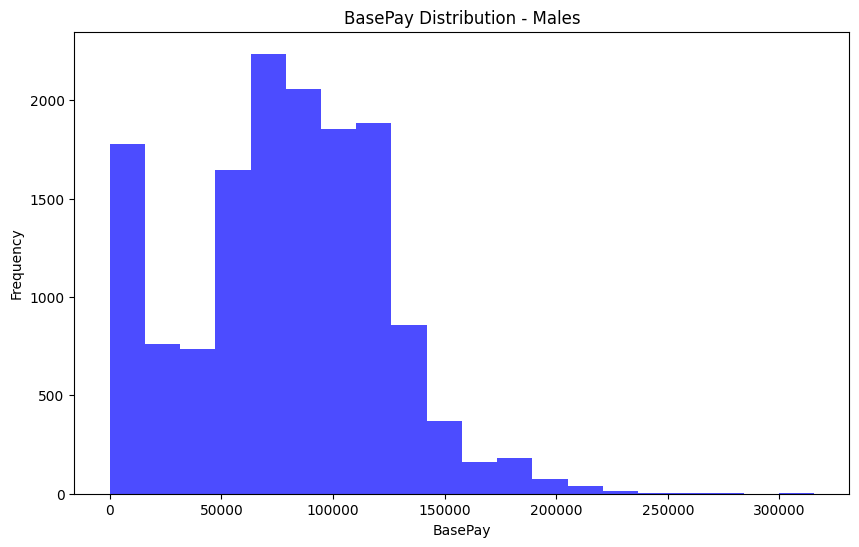

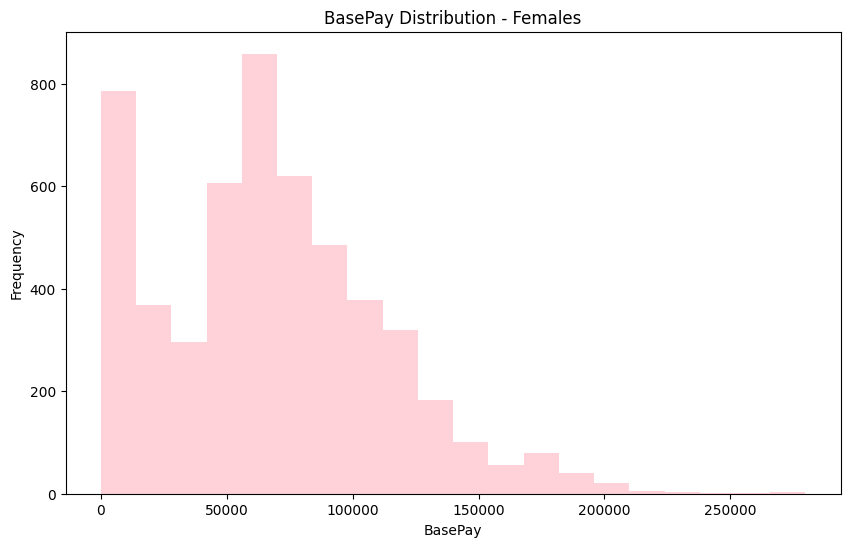

In [327]:

def guess_gender_simple(name):
    first_name = name.split()[0]
    return common_names_gender.get(first_name, 'unknown')

df['Gender'] = df['EmployeeName'].apply(guess_gender_simple)

np.random.seed(42)
df['Age'] = 2024 - df['Year'] + np.random.randint(20, 66, size=len(df))

df_filtered = df[df['Gender'] != 'unknown'].copy()

df_filtered.loc[:, 'BasePay'] = pd.to_numeric(df_filtered['BasePay'], errors='coerce')

# BasePay Distribution - Males
df_filtered_male = df_filtered[df_filtered['Gender'] == 'male']

plt.figure(figsize=(10, 6))
df_filtered_male['BasePay'].plot(kind='hist', bins=20, color='blue', alpha=0.7)
plt.title('BasePay Distribution - Males')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()

# BasePay Distribution - Females
df_filtered_female = df_filtered[df_filtered['Gender'] == 'female']

plt.figure(figsize=(10, 6))
df_filtered_female['BasePay'].plot(kind='hist', bins=20, color='pink', alpha=0.7)
plt.title('BasePay Distribution - Females')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()


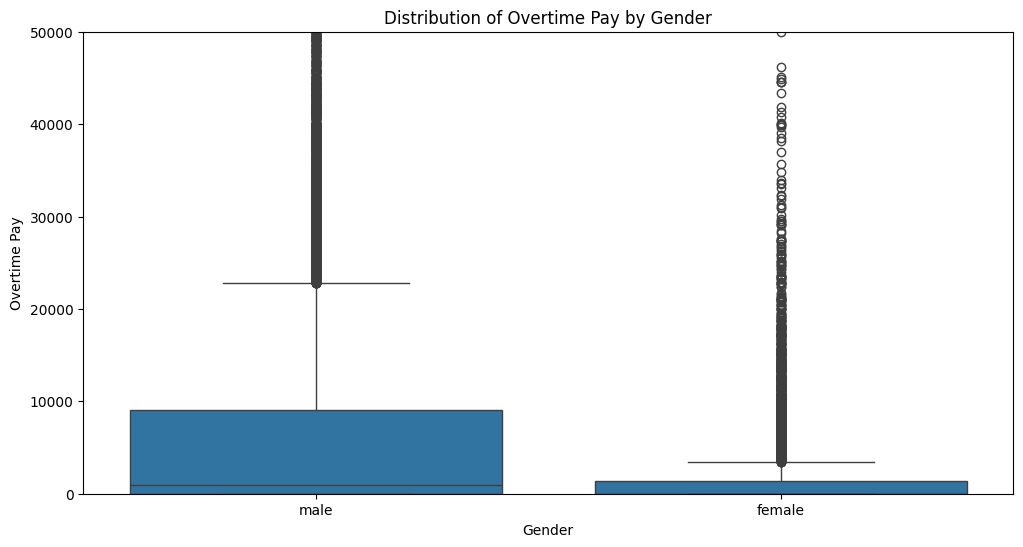

In [328]:
#Distribution of overtime Pay by Gender
plt.figure(figsize=(12, 6))
df_filtered['OvertimePay'] = pd.to_numeric(df_filtered['OvertimePay'], errors='coerce')
sns.boxplot(x='Gender', y='OvertimePay', data=df_filtered)
plt.ylim(0, 50000)  #limit for a bettere visualisation 
plt.xlabel('Gender')
plt.ylabel('Overtime Pay')
plt.title('Distribution of Overtime Pay by Gender')
plt.show()


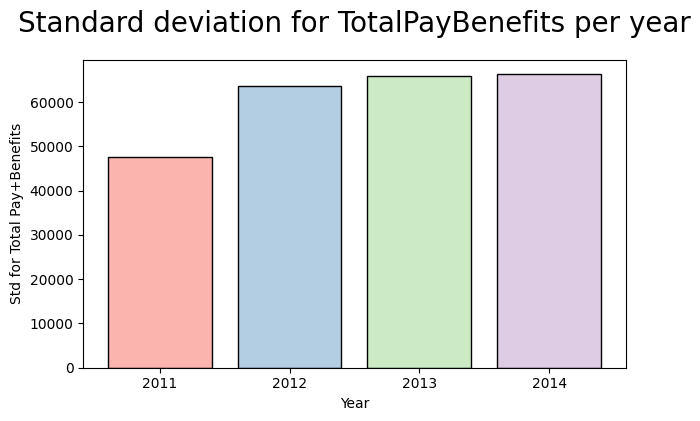

In [329]:
std_pay_per_year=df.groupby('Year')['TotalPayBenefits'].std()
plt.figure(figsize=(7, 4))
plt.title('Standard deviation for TotalPayBenefits per year', fontsize=20, pad=20)
plt.bar(x=std_pay_per_year.index, height=std_pay_per_year, color=pastel1.colors, edgecolor='black')
plt.xticks(range(2011, 2015))
plt.xlabel('Year')
plt.ylabel('Std for Total Pay+Benefits')
plt.show()

Another very interesting thing I did was to compare San Francisco salaries with current Italian salaries. 

It is amazing how despite the fact that in 2014 inflation had not hit the world economy so hard, the difference in wages is huge. 

Just think of the average attorney earning over $125000, a huge figure when compared to the mere $25,000 of an Italian lawyer. 

Other job categories subject to a huge disparity are Lieutenant and fire suppression, where the difference in salaries for the same job exceeds 100 thousand dollars and in my opinion the American one is more correct since it includes the risks connected with this job. 

To draw a general conclusion in any case, as in virtually every category with minor exceptions, American salaries are significantly higher, especially for the more specialised professions such as lawyers, surgeons or those with a higher risk to personal safety such as firefighters or police officers. 

In [330]:
#avarage Italian Salary 
italian_salaries = {
    'General Manager': 80000,
    'Police Captain': 60000,
    'Maintenance Mechanic': 30000,
    'Deputy Chief': 70000,
    'Public sector worker':30000,
   
}


def find_closest_job_title(job_title, known_titles):
    closest_titles = get_close_matches(job_title, known_titles, n=1, cutoff=0.0)
    return closest_titles[0] if closest_titles else None

known_titles = italian_salaries.keys()
df_filtered['ClosestJobTitle'] = df_filtered['JobTitle'].apply(lambda x: find_closest_job_title(x.split()[0], known_titles))
df_filtered['ItalianSalary'] = df_filtered['ClosestJobTitle'].apply(lambda x: italian_salaries.get(x, None))

comparison_df = df_filtered.dropna(subset=['ItalianSalary'])




<Figure size 1400x700 with 0 Axes>

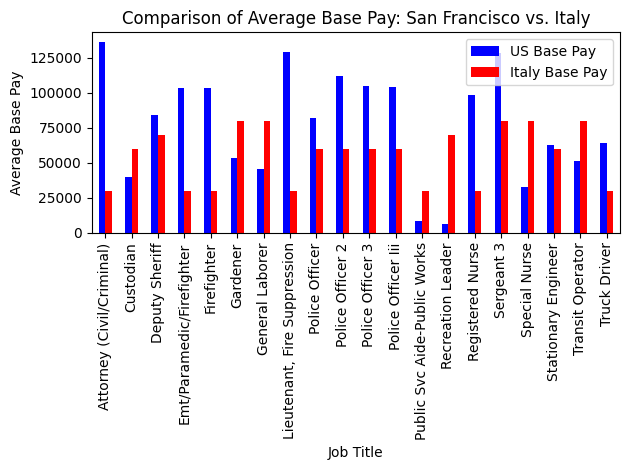

In [331]:
plt.figure(figsize=(14, 7))
job_titles = comparison_df['JobTitle'].value_counts().index[:20]
us_basepay = comparison_df[comparison_df['JobTitle'].isin(job_titles)].groupby('JobTitle')['BasePay'].mean()
italy_basepay = comparison_df[comparison_df['JobTitle'].isin(job_titles)].groupby('JobTitle')['ItalianSalary'].mean()

comparison_df = pd.DataFrame({'US Base Pay': us_basepay, 'Italy Base Pay': italy_basepay})
comparison_df.plot(kind='bar', color=['blue', 'red'])
plt.title('Comparison of Average Base Pay: San Francisco vs. Italy')
plt.xlabel('Job Title')
plt.ylabel('Average Base Pay')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [332]:
#create a mask for the fire department and the police department
fire_mask=df['JobTitle'].str.contains('Fire', case=False)
police_mask=df['JobTitle'].str.contains('Police', case=False)
#with the masks, create two separate dfs with only fire department employees and police department employees, and then concatenate them
fire_df=pd.DataFrame(df[fire_mask], columns=df.columns)
police_df=pd.DataFrame(df[police_mask], columns=df.columns)
fire_police_df=pd.concat([fire_df, police_df], axis=0, ignore_index=False, join='outer')
fire_police_df.reset_index(drop=True, inplace=True)
#create a column to store if an employee is in the fire department. If False, the employee is in the police department
fire_police_df['Fire_Dep']=fire_police_df['JobTitle'].str.contains('Fire', case=False)

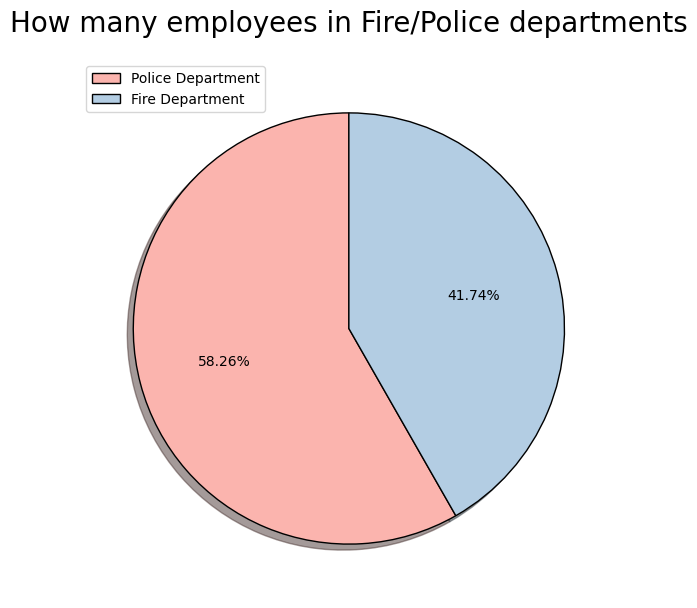

In [333]:
plt.figure(figsize=(7,7))
plt.title('How many employees in Fire/Police departments', fontsize=20, pad=20)
plt.pie(fire_police_df['Fire_Dep'].value_counts(), autopct='%.2f%%', colors=pastel1.colors, wedgeprops={'edgecolor':'black'}, shadow=True, startangle=90)
plt.legend(labels=['Police Department', 'Fire Department'], loc='upper left')
plt.show()

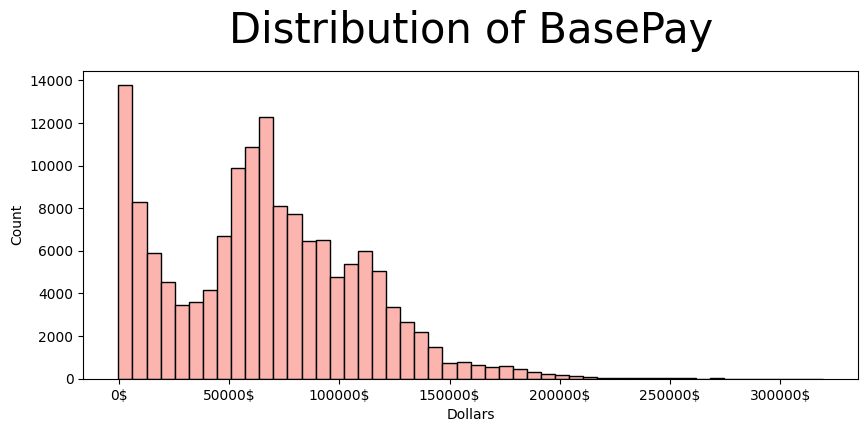

In [334]:
x_ticks=[str(x)+'$' for x in range(0,300001,50000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of BasePay', fontsize=30, pad=20)
plt.hist(df['BasePay'], bins=50, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,300001,50000), labels=x_ticks)
plt.show()

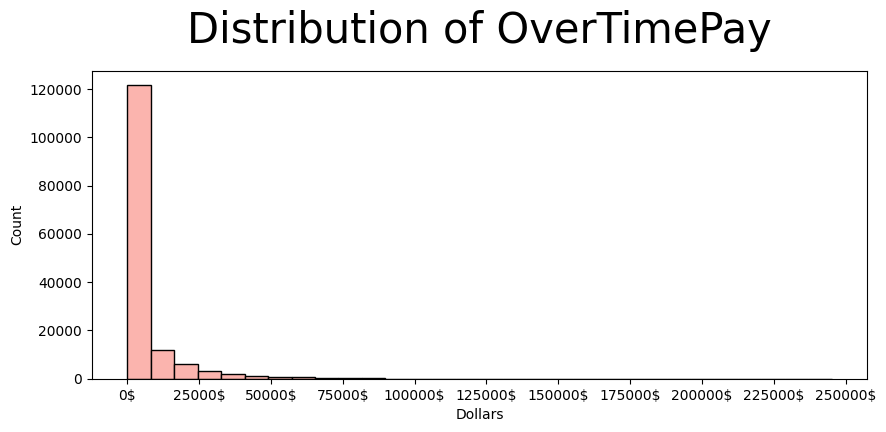

In [335]:
x_ticks=[str(x)+'$' for x in range(0,250001,25000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of OverTimePay', fontsize=30, pad=20)
plt.hist(df['OvertimePay'], bins=30, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,250001,25000), labels=x_ticks)
plt.show()

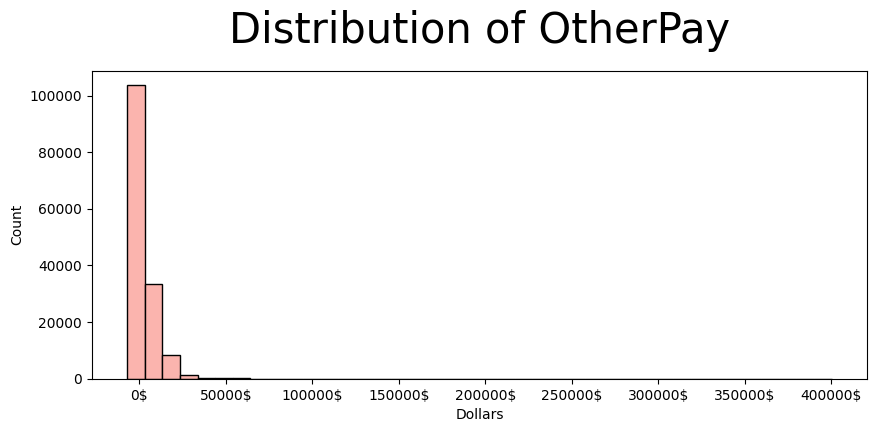

In [336]:
x_ticks=[str(x)+'$' for x in range(0,400001,50000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of OtherPay', fontsize=30, pad=20)
plt.hist(df['OtherPay'], bins=40, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,400001,50000), labels=x_ticks)
plt.show()

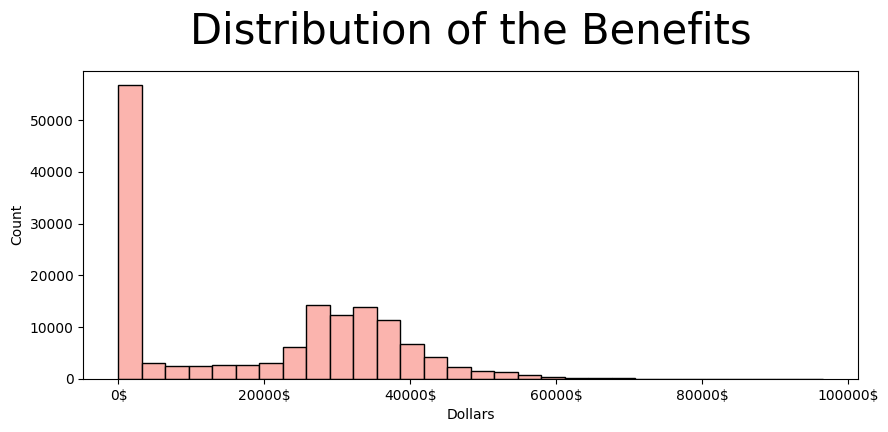

In [337]:
x_ticks=[str(x)+'$' for x in range(0,100001,20000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of the Benefits', fontsize=30, pad=20)
plt.hist(df['Benefits'], bins=30, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,100001,20000), labels=x_ticks)
plt.show()

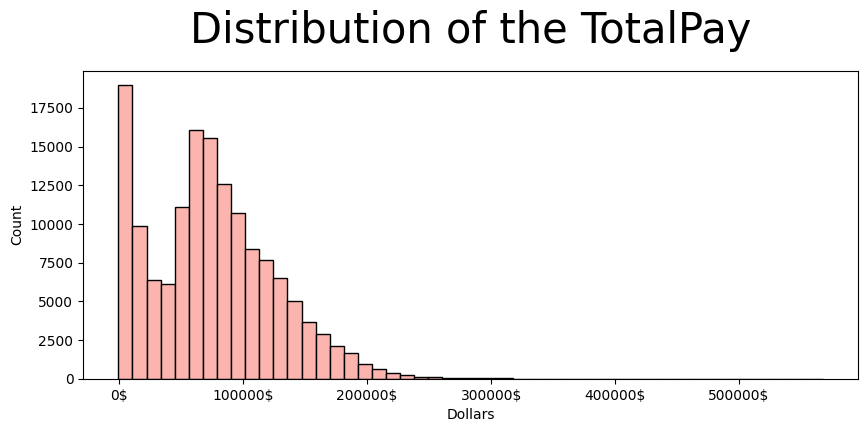

In [338]:
x_ticks=[str(x)+'$' for x in range(0,500001,100000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of the TotalPay', fontsize=30, pad=20)
plt.hist(df['TotalPay'], bins=50, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,500001,100000), labels=x_ticks)
plt.show()

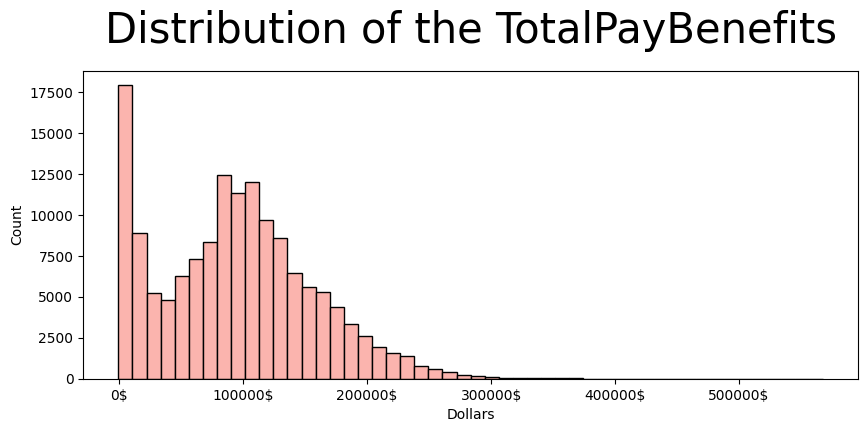

In [339]:
x_ticks=[str(x)+'$' for x in range(0,500001,100000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of the TotalPayBenefits', fontsize=30, pad=20)
plt.hist(df['TotalPayBenefits'], bins=50, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,500001,100000), labels=x_ticks)
plt.show()

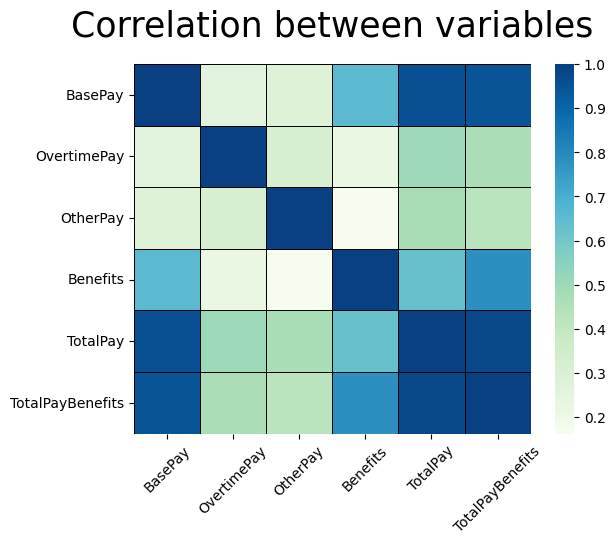

In [340]:
df_corr=df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()
plt.title('Correlation between variables', fontsize=25, pad=20)
sns.heatmap(df_corr, cmap='GnBu', linecolor='black', linewidths=0.5)
plt.xticks(rotation=45)
plt.show()

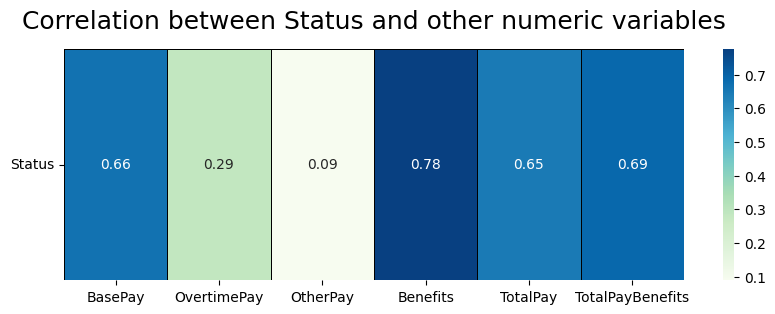

In [341]:
#create a new column with the Status values encoded
df['Status_Enc']=df['Status']
df['Status_Enc']=df['Status_Enc'].replace({'PT':0, 'FT':1})

df_corr=df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Status_Enc']].corr()
plt.figure(figsize=(10,3))
plt.title('Correlation between Status and other numeric variables', fontsize=18, pad=15)
sns.heatmap(df_corr[['Status_Enc']][:-1].T, cmap='GnBu', linecolor='black', linewidths=0.5, annot=True)
plt.yticks([0.5], labels=['Status'], rotation=0)
plt.show()

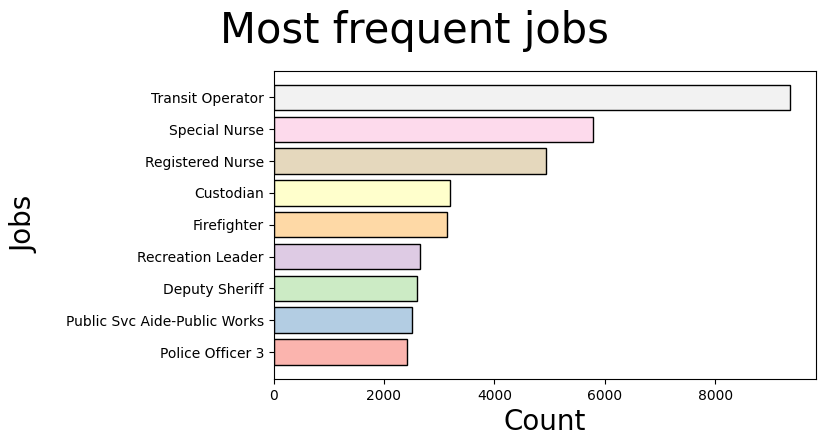

In [342]:
frequent_10_jobs=df['JobTitle'].value_counts()[:9].sort_values()
plt.figure(figsize=(7, 4))
plt.title('Most frequent jobs', fontsize=30, pad=20, x=0.26)
plt.barh(y=frequent_10_jobs.index, width=frequent_10_jobs, color=pastel1.colors, edgecolor='black')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Jobs', fontsize=20, labelpad=20)
plt.show()

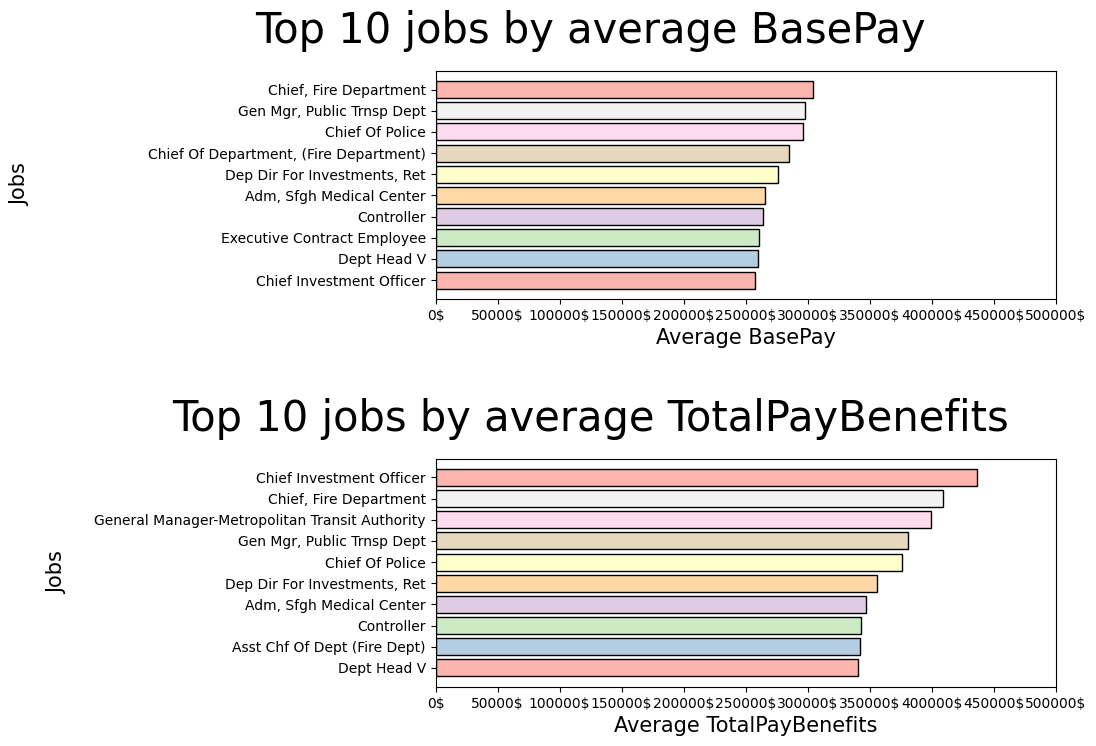

In [343]:
top_10_jobs_basepay=df.groupby('JobTitle')['BasePay'].mean().sort_values()[-10:]
top_10_jobs_tpbenefits=df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values()[-10:]
x_ticks=[str(x)+'$' for x in range(0, 500001, 50000)]
fig,axs=plt.subplots(2,1,figsize=(8,8))
plt.subplots_adjust(hspace=0.7)
axs[0].set_title('Top 10 jobs by average BasePay', fontsize=30, pad=20, x=0.25)
axs[0].barh(y=top_10_jobs_basepay.index, width=top_10_jobs_basepay, color=pastel1.colors, edgecolor='black')
axs[0].set_xlabel('Average BasePay', fontsize=15)
axs[0].set_ylabel('Jobs', fontsize=15, labelpad=85)
axs[0].set_xticks(ticks=range(0, 500001, 50000), labels=x_ticks)
axs[1].set_title('Top 10 jobs by average TotalPayBenefits', fontsize=30, pad=20, x=0.25)
axs[1].barh(y=top_10_jobs_tpbenefits.index, width=top_10_jobs_tpbenefits, color=pastel1.colors, edgecolor='black')
axs[1].set_xlabel('Average TotalPayBenefits', fontsize=15)
axs[1].set_ylabel('Jobs', fontsize=15, labelpad=20)
axs[1].set_xticks(ticks=range(0, 500001, 50000), labels=x_ticks)
plt.show()

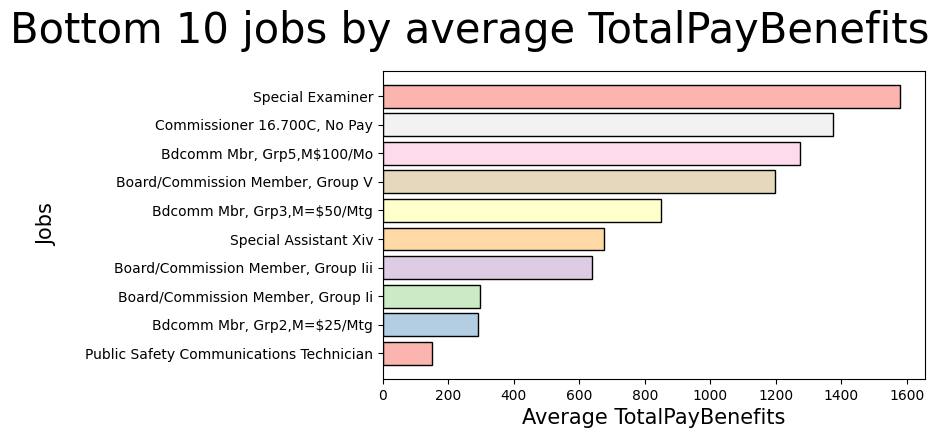

In [344]:
bot_10_jobs_tpbenefits=df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values()[:10]
x_ticks=[str(x)+'$' for x in range(0, 500001, 50000)]
plt.figure(figsize=(7, 4))
plt.title('Bottom 10 jobs by average TotalPayBenefits', fontsize=30, pad=20, x=0.16)
plt.barh(y=bot_10_jobs_tpbenefits.index, width=bot_10_jobs_tpbenefits, color=pastel1.colors, edgecolor='black')
plt.xlabel('Average TotalPayBenefits', fontsize=15)
plt.ylabel('Jobs', fontsize=15, labelpad=20)
plt.show()

In [345]:
#some statistics about the wages
print('Mean salary:', round(df['TotalPayBenefits'].mean()), '$')
print('Median salary:', round(df['TotalPayBenefits'].median()), '$')
print('Mode salary:', round(df['TotalPayBenefits'].mode()[0]), '$')
print('Minimum salary:', round(df['TotalPayBenefits'].min()), '$')
print('Maximum salary:', round(df['TotalPayBenefits'].max()), '$')
print('Standard deviation of salaries:', round(df['TotalPayBenefits'].std()), '$')

Mean salary: 94038 $
Median salary: 92676 $
Mode salary: 123291 $
Minimum salary: -618 $
Maximum salary: 567595 $
Standard deviation of salaries: 62683 $


The machine learning model used in this case is the Random Forest Regressor, an ensemble learning algorithm that combines predictions from multiple base models to improve predictive performance. 

Random Forest is a versatile machine learning algorithm that is primarily used for classification and regression tasks. 
It works by constructing multiple decision trees during training and outputs the average prediction of the individual trees (for regression) or the majority vote (for classification).

This are the most common cases of uses and Purpose: 

Classification: Random Forest is widely used to classify data into different categories, such as spam detection, image recognition, and medical diagnosis.

Regression:  It is also used for predicting continuous values, such as house prices, stock prices, or salary predictions.

Feature Importance: Random Forest can be used to rank the importance of different features in the dataset, helping to identify which variables have the most influence on the target variable.

Robustness: It is robust to outliers and noise in the data, providing high accuracy even with complex datasets.

The dataset undergoes pre-processing where columns `BasePay`, `OvertimePay`, `OtherPay`, `Benefits`, `TotalPay`, and `TotalPayBenefits` are converted to numeric values. Rows with missing values in these columns are then removed. The features (`BasePay`, `OvertimePay`, `OtherPay`, `Benefits`) are separated from the target (`TotalPayBenefits`).

The dataset is split into training (80%) and testing (20%) sets. A Random Forest Regressor with 100 trees is created and trained using the training set. The model is then used to predict the target values for the test set.

The model's performance is evaluated using Mean Squared Error (MSE) and the coefficient of determination (R²). MSE measures the average squared difference between predicted and actual values, with a lower value indicating better accuracy. R² indicates how well the model explains the variability of the data, with values closer to 1 indicating better performance.

This model is useful for predicting the total pay including benefits for employees based on their base pay, overtime pay, other pay, and benefits, which can aid in human resources management and financial planning.

In [346]:
#conversion of columns in numerical value
cols_to_convert = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
#remove missing value

df = df.dropna(subset=cols_to_convert)

X = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']]      #creating axes x and y 
y = df['TotalPayBenefits']
#training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#random forest model 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
#prediction
y_pred = model.predict(X_test)
#model valutation 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [347]:
#result
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 6717954.614882223
R² Score: 0.9983043147697641
